In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 3
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

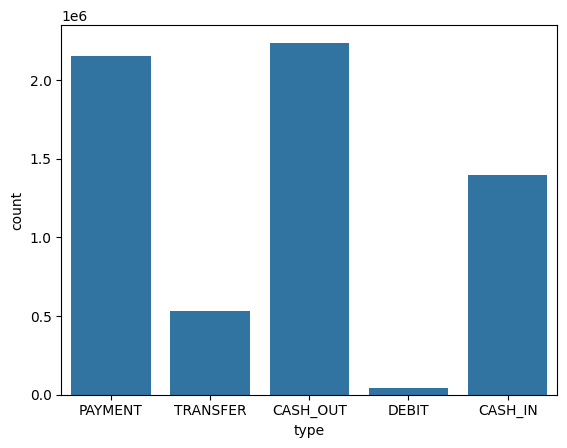

In [6]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

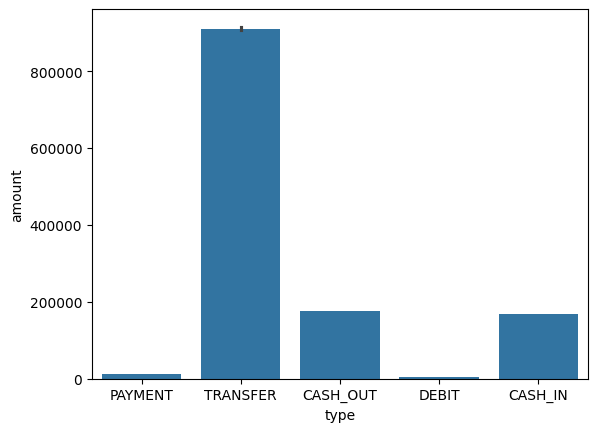

In [7]:
sns.barplot(x='type', y='amount', data=data)

In [8]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

isFraud
0    6354407
1    6354407
Name: count, dtype: int64


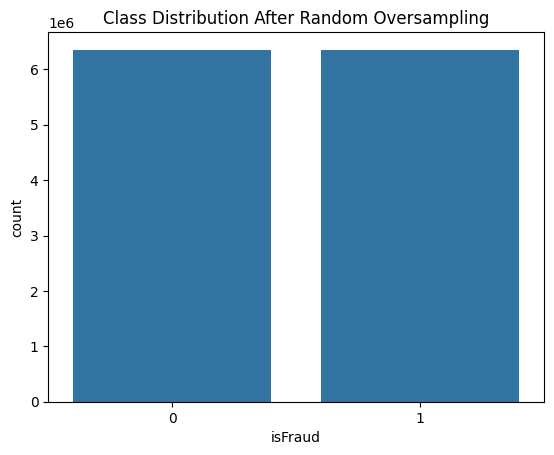

In [9]:
from sklearn.utils import resample

# Separate majority and minority classes
fraud = data[data['isFraud'] == 1]
non_fraud = data[data['isFraud'] == 0]

# Oversample the minority class
fraud_oversampled = resample(fraud, 
                             replace=True, 
                             n_samples=len(non_fraud),  # Match the majority class
                             random_state=42)

# Combine majority and oversampled minority classes
data_balanced = pd.concat([non_fraud, fraud_oversampled])

# Shuffle the data
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(data_balanced['isFraud'].value_counts())
sns.countplot(x='isFraud', data=data_balanced)
plt.title("Class Distribution After Random Oversampling")
plt.show()


<Figure size 1500x600 with 0 Axes>

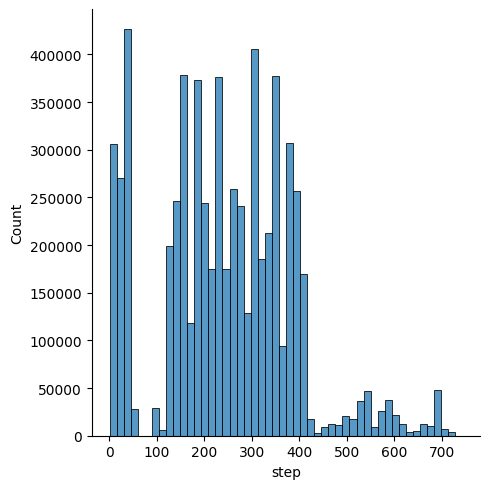

In [10]:
plt.figure(figsize=(15, 6))
sns.displot(data['step'], bins=50)


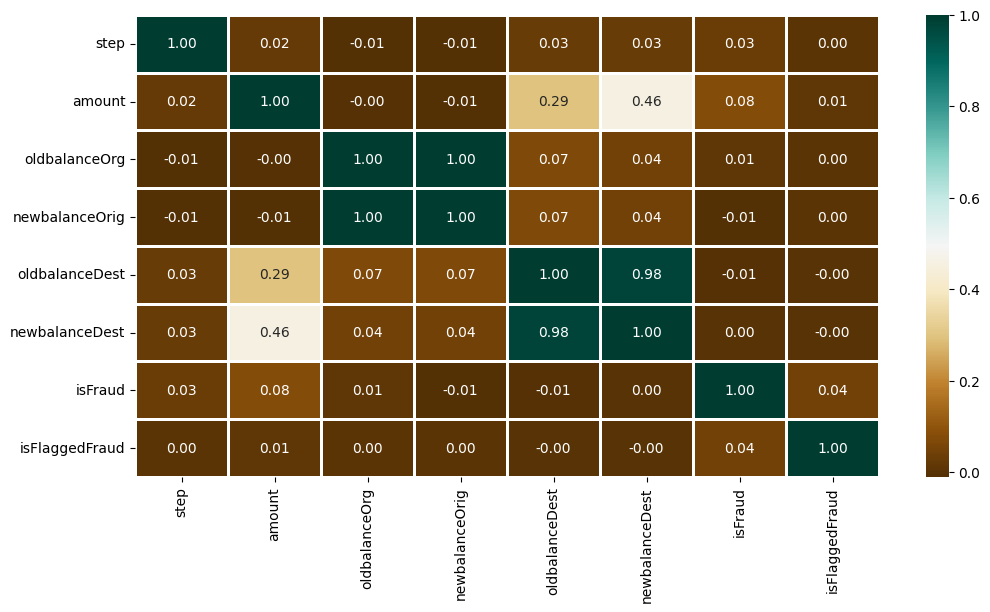

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Now plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Extract features (X) and target (y) from the balanced dataset
X = data_balanced.drop('isFraud', axis=1)  # Drop the target column
y = data_balanced['isFraud']  # The target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Check the shape of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training features shape: (8896169, 10)
Testing features shape: (3812645, 10)
Training labels shape: (8896169,)
Testing labels shape: (3812645,)


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Data preparation function
def prepare_data(data_balanced):
    X = data_balanced.drop('isFraud', axis=1)
    y = data_balanced['isFraud']
    
    categorical_columns = X.select_dtypes(include=['object']).columns
    label_encoders = {}
    
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])
    
    return X, y, label_encoders

# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Calculate ROC AUC Score
    train_preds = model.predict_proba(X_train)[:, 1]
    test_preds = model.predict_proba(X_test)[:, 1]
    
    # Calculate Accuracy
    train_pred_labels = model.predict(X_train)
    test_pred_labels = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred_labels) * 100
    test_accuracy = accuracy_score(y_test, test_pred_labels) * 100
    
    # Print metrics
    print(f"\nResults for {model_name}:")
    print(f'Training ROC AUC: {round(ras(y_train, train_preds), 4)}')
    print(f'Testing ROC AUC: {round(ras(y_test, test_preds), 4)}')
    print(f'Training Accuracy: {train_accuracy:.2f}%')
    print(f'Testing Accuracy: {test_accuracy:.2f}%')
    
    # Plot confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Prepare the data
X, y, label_encoders = prepare_data(data_balanced)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Training Logistic Regression...


c:\Users\Rithvik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results for Logistic Regression:
Training ROC AUC: 0.9844
Testing ROC AUC: 0.9844
Training Accuracy: 93.93%
Testing Accuracy: 93.92%


<Figure size 800x600 with 0 Axes>

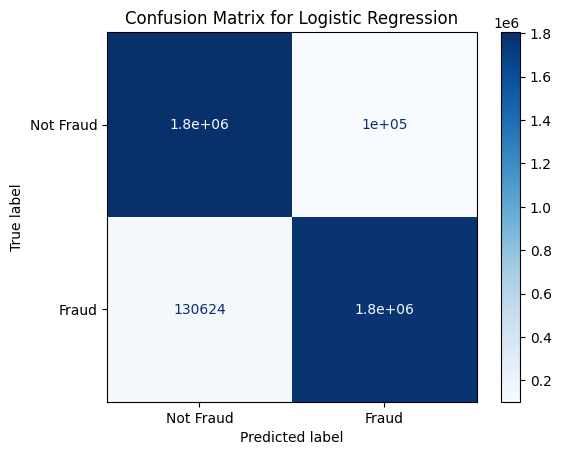

In [15]:
# 1. Logistic Regression
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression")


Training XGBoost...

Results for XGBoost:
Training ROC AUC: 1.0
Testing ROC AUC: 1.0
Training Accuracy: 99.93%
Testing Accuracy: 99.92%


<Figure size 800x600 with 0 Axes>

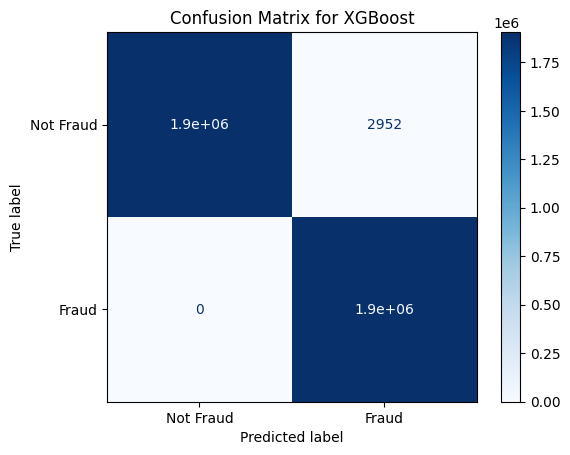

In [16]:
# 2. XGBoost
print("\nTraining XGBoost...")
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")


Training Random Forest...

Results for Random Forest:
Training ROC AUC: 1.0
Testing ROC AUC: 1.0
Training Accuracy: 100.00%
Testing Accuracy: 100.00%


<Figure size 800x600 with 0 Axes>

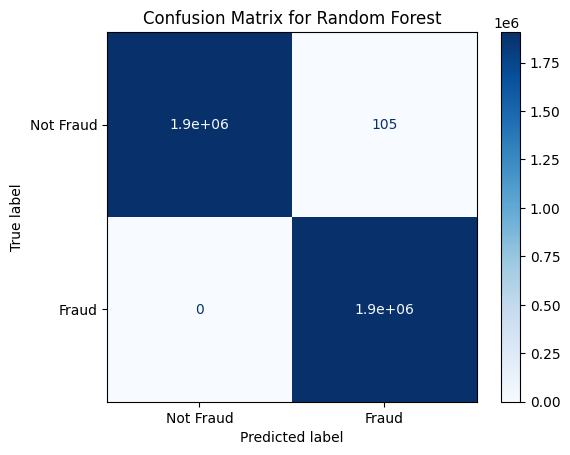

In [17]:
# 3. Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")